In [1]:
from data_loader import load_images_and_labels

In [2]:
import tensorflow as tf

In [3]:
# list tf devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing and Feature Engineering Data

In [5]:
directory = "caltech-101/101_ObjectCategories"
img_height = 224
img_width = 224

exclude_classes = {"airplanes", "Motorbikes", "Faces", "Faces_easy", "watch", "Leopards"}
images, labels, class_names = load_images_and_labels(directory, img_height, img_width, exclude_classes)

In [6]:
images = images / 255.0

In [7]:
print("Number of images: ", len(images), "| Size in memory: ", images.nbytes / 1024 / 1024 / 1024, "GB")
print("Number of labels: ", len(labels))
print("Number of class names: ", len(class_names))

Number of images:  5770 | Size in memory:  1.6177940368652344 GB
Number of labels:  5770
Number of class names:  95


In [8]:
class_names

['accordion',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'schooner',
 'scissors',
 'scorpion',
 'sea_horse',
 'snoopy',
 'socce

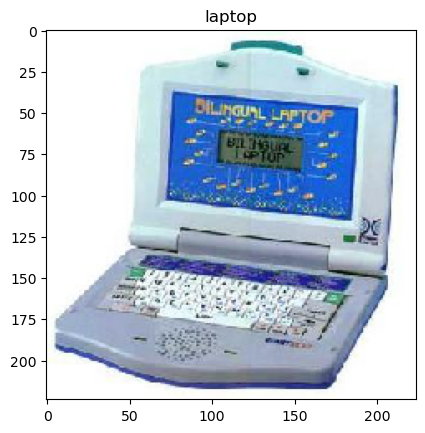

In [9]:
# show a random image
index = random.randint(0, len(images))
plt.imshow(images[index].astype(np.float32))
plt.title(class_names[labels[index]])
plt.show()

In [10]:
labels

array([ 0,  0,  0, ..., 94, 94, 94])

In [11]:
images[64]

array([[[0.996 , 0.992 , 1.    ],
        [0.9844, 0.9805, 1.    ],
        [0.8823, 0.8784, 0.898 ],
        ...,
        [0.992 , 0.992 , 1.    ],
        [1.    , 1.    , 1.    ],
        [1.    , 1.    , 1.    ]],

       [[0.9097, 0.906 , 0.9253],
        [0.9688, 0.965 , 0.9844],
        [0.886 , 0.8823, 0.902 ],
        ...,
        [0.9766, 0.9766, 0.9844],
        [0.9844, 0.9844, 0.992 ],
        [0.9844, 0.9844, 0.992 ]],

       [[0.796 , 0.792 , 0.816 ],
        [0.8823, 0.8784, 0.902 ],
        [0.8784, 0.8745, 0.898 ],
        ...,
        [0.9727, 0.9727, 0.9805],
        [0.9805, 0.9805, 0.9883],
        [0.9805, 0.9805, 0.9883]],

       ...,

       [[0.749 , 0.784 , 0.953 ],
        [0.745 , 0.7803, 0.949 ],
        [0.7334, 0.7686, 0.937 ],
        ...,
        [0.855 , 0.8823, 0.9844],
        [0.89  , 0.9214, 0.996 ],
        [0.9214, 0.949 , 1.    ]],

       [[0.745 , 0.7803, 0.949 ],
        [0.745 , 0.7803, 0.949 ],
        [0.7334, 0.7686, 0.937 ],
        .

# Data Augmentation

As seen in [exploratory_data_analysis.ipynb](exploratory_data_analysis.ipynb), each class has a different number of images. This will cause bias in our model towards certain classes. We need to fix this by generating more images for the classes that are under represented.

In [12]:
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
# )

# unique_classes, class_counts = np.unique(labels, return_counts=True)
# max_count = np.max(class_counts)

# balanced_images = []
# balanced_labels = []

# for class_id in unique_classes:
#     # get all images and labels of the current class
#     class_images = images[labels == class_id]
#     class_labels = labels[labels == class_id]
    
#     # add the ones we already have to the balanced dataset
#     balanced_images.extend(class_images)
#     balanced_labels.extend(class_labels)
    
#     num_to_generate = max_count - len(class_images)
    
#     if num_to_generate > 0:
#         augmented_images = []
#         augmented_labels = []
#         # generate new images
#         for x_batch, y_batch in datagen.flow(class_images, class_labels, batch_size=num_to_generate):
#             augmented_images.extend(x_batch)
#             augmented_labels.extend(y_batch)
#             if len(augmented_images) >= num_to_generate:
#                 break
        
#         # add generated images to balanced dataset
#         balanced_images.extend(augmented_images[:num_to_generate])
#         balanced_labels.extend(augmented_labels[:num_to_generate])

# balanced_images = np.array(balanced_images)
# balanced_labels = np.array(balanced_labels)

In [13]:
# x_train, x_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, stratify=balanced_labels, random_state=123)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=123)
 
print("Class Names:", class_names)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

del images
del labels

Class Names: ['accordion', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler', 'starfish', 'stegosaurus', 'stop_sign', 'straw

In [14]:
x_train = np.array(x_train, dtype=np.float16)
x_test = np.array(x_test, dtype=np.float16)

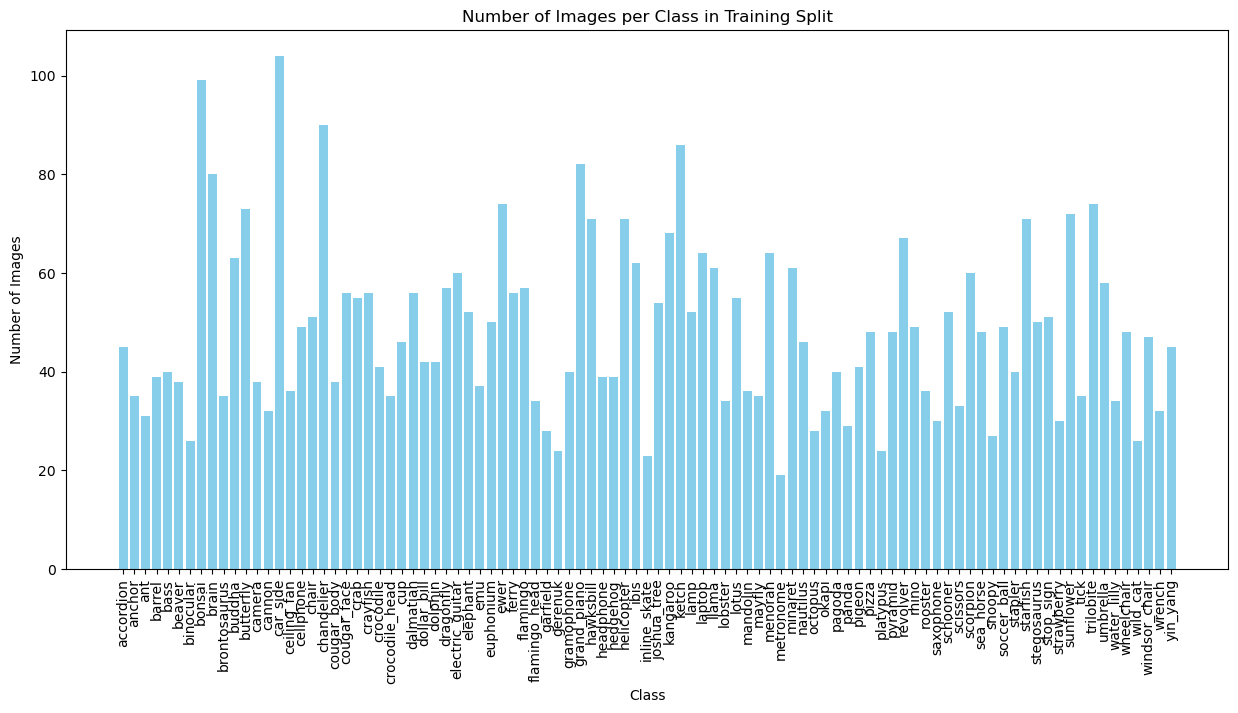

In [15]:
# show number of images per class in the training split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_train), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Split')
plt.show()

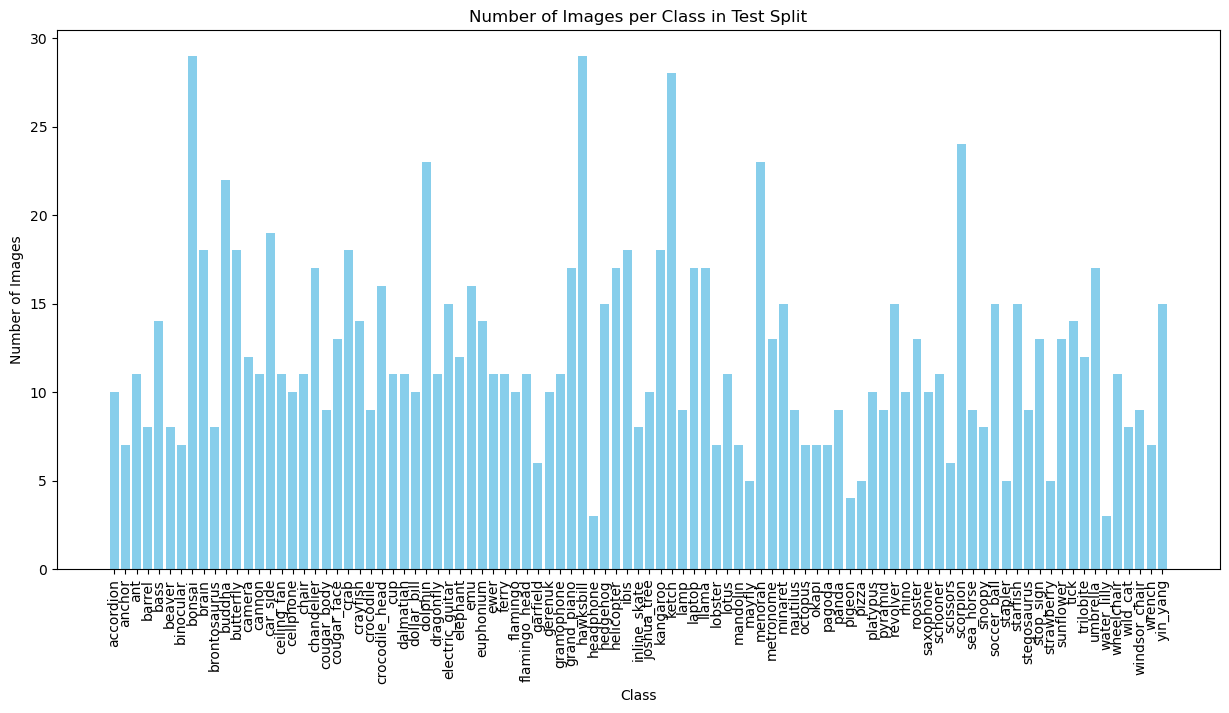

In [16]:
# show number of images per class in the test split - you can see that the dataset is now balanced
plt.figure(figsize=(15, 7))
plt.bar(class_names, np.bincount(y_test), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Test Split')
plt.show()

In [17]:
# # shows a random augmented image
# index = random.randint(0, len(show_images))
# plt.imshow(balanced_images[index])
# plt.title(class_names[balanced_labels[index]])
# plt.show()

# CNN Model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 512)               201867776 
                                                                 
 dropout (Dropout)           (None, 512)               0

In [19]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [20]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="max",
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    x_train, y_train, epochs=10, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/10
 50/116 [===========>..................] - ETA: 1:16 - loss: 89.0208 - accuracy: 0.0375

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 1s 9ms/step - loss: 4.9438 - accuracy: 0.1147
Test accuracy: 0.11472039669752121


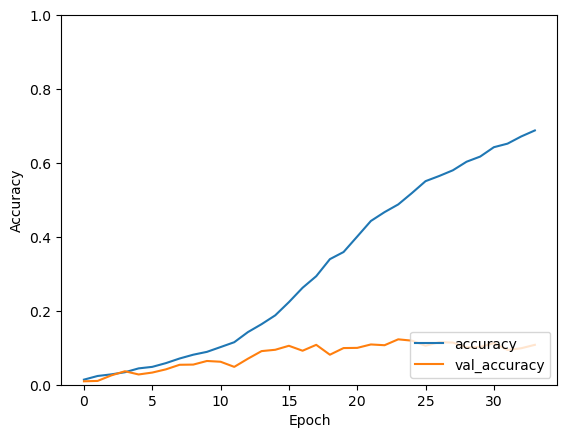

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Use transfer learning to improve results and stop overfitting

In [24]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
244/244 [==============================] - ETA: 0s - loss: 4.3363 - accuracy: 0.0421
Epoch 1: val_accuracy improved from -inf to 0.18808, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 26s 63ms/step - loss: 4.3363 - accuracy: 0.0421 - val_loss: 3.8073 - val_accuracy: 0.1881
Epoch 2/100
244/244 [==============================] - ETA: 0s - loss: 3.7949 - accuracy: 0.1033
Epoch 2: val_accuracy improved from 0.18808 to 0.31244, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 13s 55ms/step - loss: 3.7949 - accuracy: 0.1033 - val_loss: 3.1445 - val_accuracy: 0.3124
Epoch 3/100
243/244 [============================>.] - ETA: 0s - loss: 3.4870 - accuracy: 0.1381
Epoch 3: val_accuracy improved from 0.31244 to 0.36434, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 19s 77ms/step - loss: 3.4873 - accuracy: 0.

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 3s 42ms/step - loss: 1.6861 - accuracy: 0.5600
Test accuracy: 0.5600329041481018


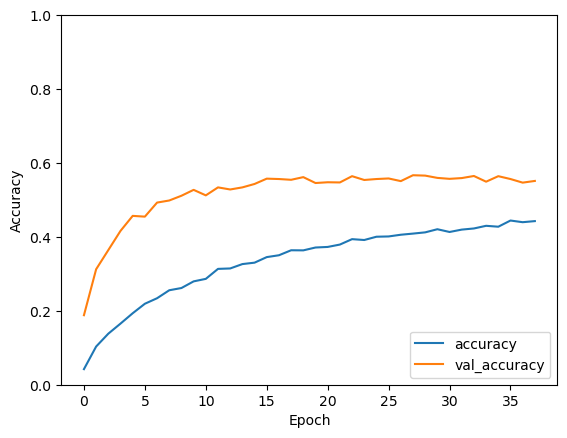

In [27]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

As we can see above, using the pretrained model has helped stop the overfitting, but our evaluation accuracy is plateauing at around 55%. Let's fix that by adjusting the layers.

In [28]:
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# unfreeze the last layers of the base model
for layer in base_model.layers[-8:]:
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_transfer_learning_model_fix_overfitting.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

reduce_learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=3,
    mode="auto",
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
243/244 [============================>.] - ETA: 0s - loss: 5.0485 - accuracy: 0.0869
Epoch 1: val_accuracy improved from -inf to 0.26670, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 17s 63ms/step - loss: 5.0481 - accuracy: 0.0869 - val_loss: 3.5296 - val_accuracy: 0.2667
Epoch 2/100
243/244 [============================>.] - ETA: 0s - loss: 3.3034 - accuracy: 0.2801
Epoch 2: val_accuracy improved from 0.26670 to 0.41470, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 12s 51ms/step - loss: 3.3027 - accuracy: 0.2804 - val_loss: 2.7285 - val_accuracy: 0.4147
Epoch 3/100
243/244 [============================>.] - ETA: 0s - loss: 2.7721 - accuracy: 0.3875
Epoch 3: val_accuracy improved from 0.41470 to 0.50925, saving model to best_transfer_learning_model_fix_overfitting.h5
244/244 [==============================] - 13s 51ms/step - loss: 2.7728 - accuracy: 0.

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

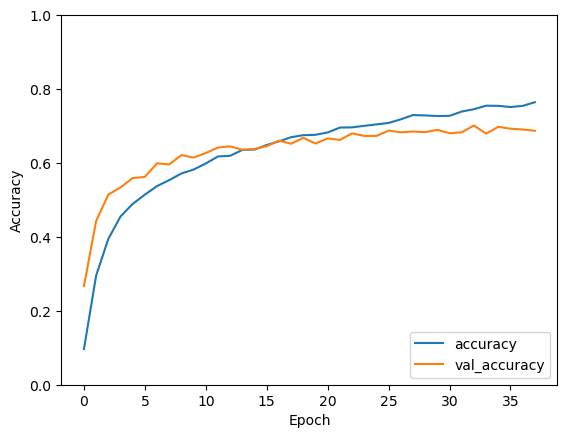

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 

# Accuracy is higher, but still not fully reliable. Choosing a pretrained model with more layers should give better results.

In [ ]:
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

base_model.trainable = False

# unfreeze the last layers of the base model
for layer in base_model.layers[-12:]:
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

batch_size = 32

learning_rate = 0.001 * (batch_size / 32)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [25]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="resnet_high_res.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    restore_best_weights=True,
    verbose=1,
)

reduce_learning_rate_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=3,
    mode="auto",
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    x_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/100
 11/116 [=>............................] - ETA: 10:05 - loss: 14.6800 - accuracy: 0.0199

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

76/76 [==============================] - 3s 35ms/step - loss: 2.8869 - accuracy: 0.5909
Test accuracy: 0.5908716917037964


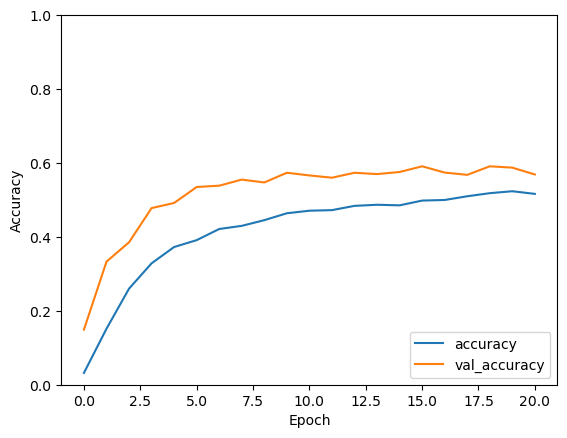

In [ ]:
# plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show() 